In [1]:
# needed
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import mpld3
# data class
from dataset import dataset
%matplotlib inline

mpld3.enable_notebook()


# Loading the data files
* declare dataset object
* use object to load training set
* visualize head of training set 

In [2]:
ds = dataset()
ds.build_train_set()


# Linear Model

## Split features and targets

In [3]:
TD = ds.training_data.sample(frac=1)
y = TD.d_temp
X = TD.drop('d_temp', axis=1)

In [4]:
#poly = PolynomialFeatures(2)
#Xs = poly.fit_transform(X)
scaler = MinMaxScaler()
Xs = scaler.fit_transform(X)


## Validation split

In [5]:
#LM = linear_model.LinearRegression(fit_intercept=False)
LM = linear_model.Ridge(alpha=7, fit_intercept=False)
#LM = SVR(kernel='poly')
LM.fit(Xs, y)
#LM.coef_

Ridge(alpha=7, fit_intercept=False)

parameters = {
              'alpha': [.000001, .00001, .0001, .001,.005,.01,.05, 1, 5, 10, 50],
              }
LMg = linear_model.Ridge(fit_intercept=False)
LM = GridSearchCV(LMg, parameters, scoring='neg_mean_squared_error', cv=20)
LM.fit(Xs,y)

LM.best_estimator_

In [6]:
#pd.DataFrame(LM.cv_results_)

# predictor

In [7]:
def predictor(X):
    #Xs = poly.transform(X)
    Xs = scaler.transform(X)
    return LM.predict(Xs)


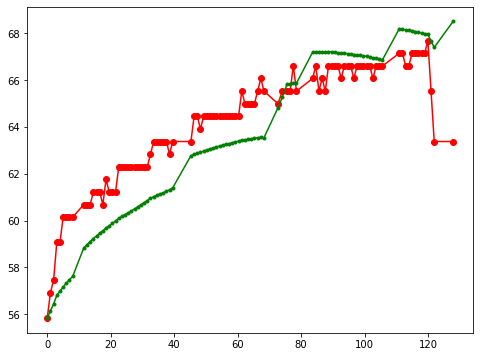

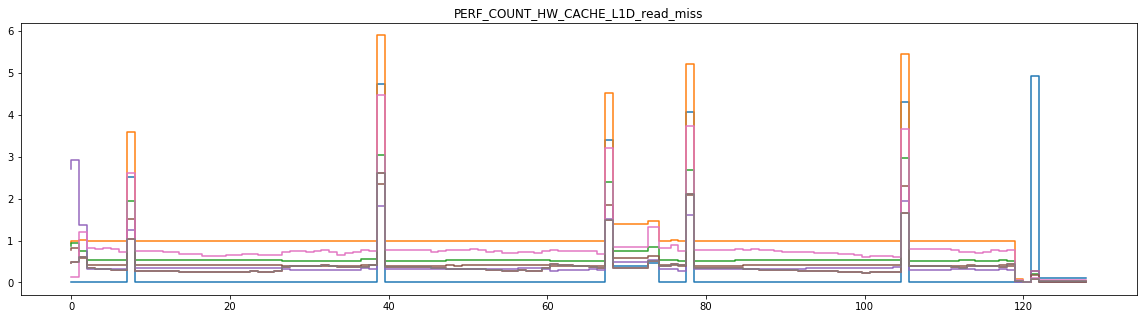

In [64]:
df,t,p,x = ds.trace_test(predictor)
plt.figure(figsize=(8,6))
plt.plot(x,t,'ro-')
plt.plot(x,p[:-1],'g.-')
plt.show()
d = pd.DataFrame(scaler.transform(df), columns=df.columns)
plt.figure(figsize=(20,5))

for event in d.columns:
    if event == 'temp':
        continue
    plt.step(x,d[event])
    plt.title(event)
plt.show()


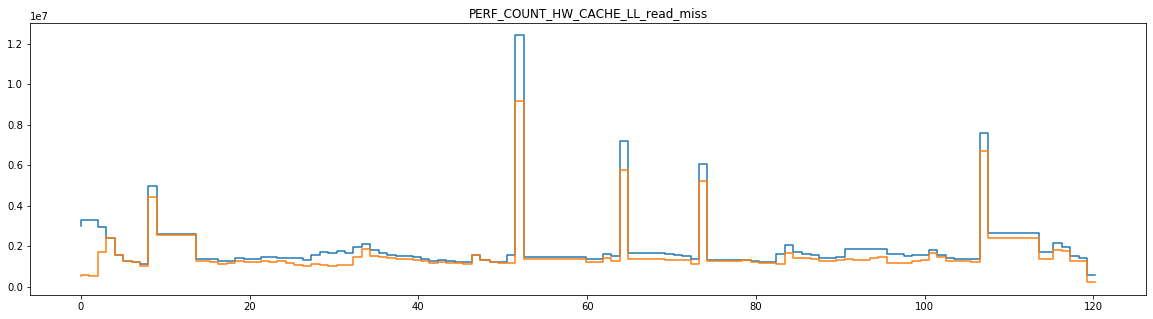

In [9]:
plt.figure(figsize=(20,5))
for event in df.columns:
    if event != 'PERF_COUNT_HW_CACHE_MISSES' and event != 'PERF_COUNT_HW_CACHE_LL_read_miss':
        continue
    plt.step(x,df[event])
    plt.title(event)
plt.show()

In [10]:
#fs = zip(LM.best_estimator_.coef_, df.columns)
fs = zip(LM.coef_, df.columns)
[print(x) for x in fs];


(-0.33573734160364677, 'temp')
(0.0, 'delta_t')
(0.0949591611376926, 'PERF_COUNT_HW_CPU_CYCLES')
(0.06251086791131802, 'PERF_COUNT_HW_INSTRUCTIONS')
(0.002247369792022475, 'PERF_COUNT_HW_CACHE_MISSES')
(0.04360854001439513, 'PERF_COUNT_HW_BRANCH_MISSES')
(0.05981634948209215, 'PERF_COUNT_HW_BRANCH_INSTRUCTIONS')
(0.14819966387422404, 'PERF_COUNT_HW_CACHE_LL_read_miss')
(0.002258299049407044, 'PERF_COUNT_HW_CACHE_L1D_read_miss')


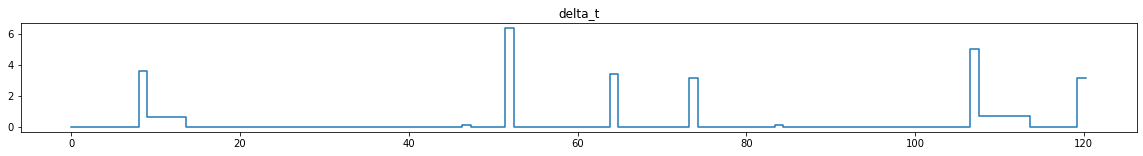

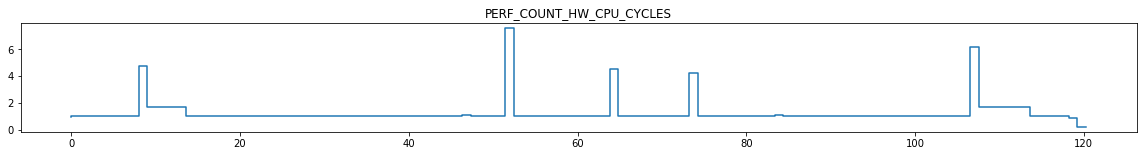

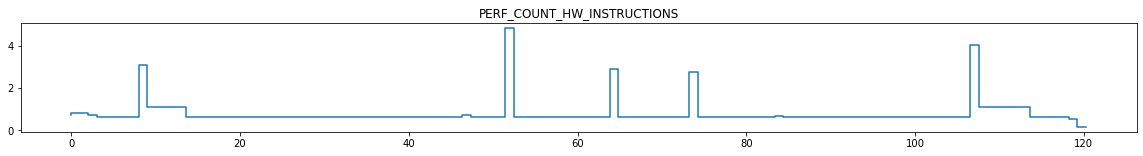

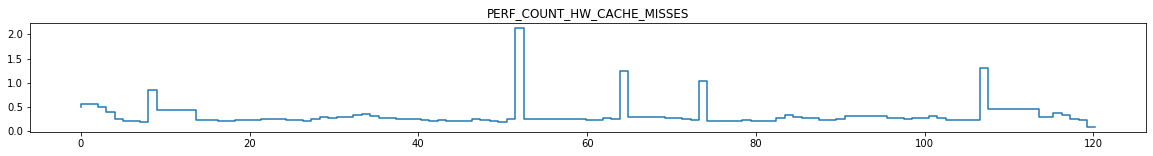

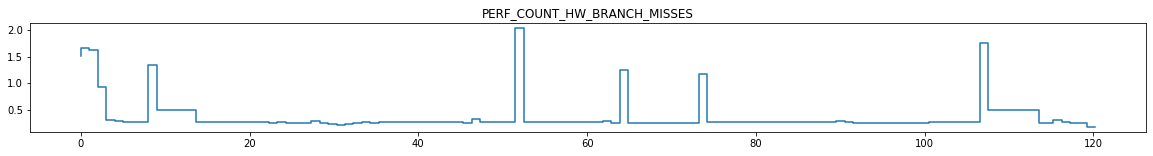

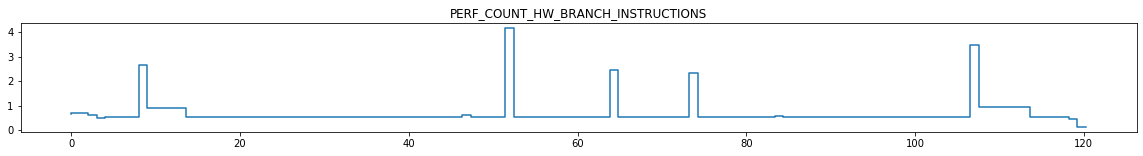

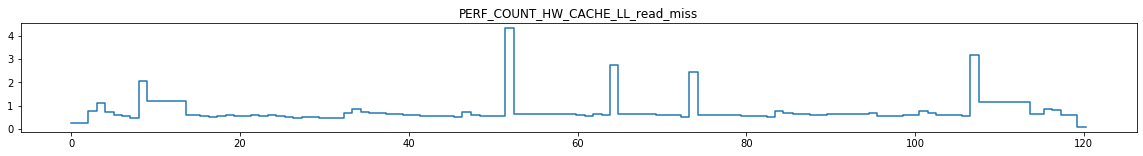

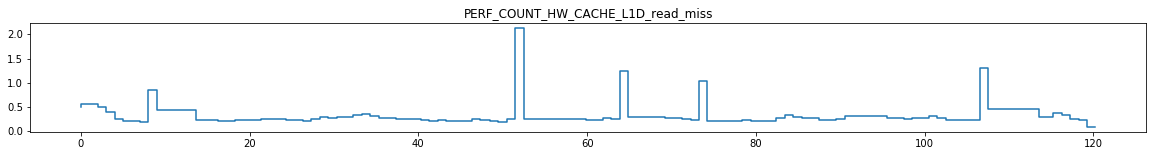

In [11]:
d = pd.DataFrame(scaler.transform(df), columns=df.columns)
#d = df

for event in d.columns:
    if event == 'temp':
        continue
    plt.figure(figsize=(20,2))
    plt.step(x,d[event])
    plt.title(event)
    plt.show()

In [12]:
for i in df:print(i)

temp
delta_t
PERF_COUNT_HW_CPU_CYCLES
PERF_COUNT_HW_INSTRUCTIONS
PERF_COUNT_HW_CACHE_MISSES
PERF_COUNT_HW_BRANCH_MISSES
PERF_COUNT_HW_BRANCH_INSTRUCTIONS
PERF_COUNT_HW_CACHE_LL_read_miss
PERF_COUNT_HW_CACHE_L1D_read_miss


In [13]:
y = ds.training_data.d_temp.to_numpy()
X = ds.training_data.drop('d_temp',axis=1)

sv = MinMaxScaler()
Xv = sv.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xv,y,test_size = .3)

In [14]:
Lv = linear_model.Ridge(alpha=1, fit_intercept = False)
Lv.fit(X_train, y_train)
x = zip(X.columns,Lv.coef_)
#for i in x: print(i)
param_dict = {}
for i in x: param_dict[i[0]] = i[1]
    
def v_predict(X):
    Xs = sv.transform(X)
    return Lv.predict(Xs)

pd.DataFrame({'parameter value':Lv.coef_}, index=X.columns)

parameter value
temp                                     -0.360556
delta_t                                   0.000000
PERF_COUNT_HW_CPU_CYCLES                  0.014246
PERF_COUNT_HW_INSTRUCTIONS                0.076606
PERF_COUNT_HW_CACHE_MISSES                0.010050
PERF_COUNT_HW_BRANCH_MISSES               0.083903
PERF_COUNT_HW_BRANCH_INSTRUCTIONS         0.133547
PERF_COUNT_HW_CACHE_LL_read_miss          0.205845
PERF_COUNT_HW_CACHE_L1D_read_miss         0.010106

In [15]:
y_hat = Lv.predict(X_test)

In [16]:
for idx in range(30):
    fname = ds.test_files[idx]
    td = dataset._delta_temp_column(fname)
    td = dataset.load_dataframe(fname)
    #yt = td.d_temp.to_numpy()
    #Xt = td.drop('d_temp',axis=1)
    #Xts = sv.transform(Xt)
    #yt_hat = Lv.predict(Xts)
    print(td.head(1))
    truth, pred, time = ds.trace_manual(td, v_predict)
    r = range(len(yt_hat))
    plt.figure(figsize=(15,6))
    #plt.plot(r,np.cumsum(yt),'r')
    #plt.plot(r,np.cumsum(yt_hat),'g')
    plt.plot(time,truth,'r.-')
    plt.plot(time,pred[:-1],'g.-')
    plt.show()

temp: [54.768 56.92  57.458 57.996 57.996 57.996 59.072 59.072]
t0  : [54.768 56.92  57.458 57.996 57.996 57.996 59.072 59.072]
t1  : [56.92  57.458 57.996 57.996 57.996 59.072 59.072 59.072]
dt  : [2.152 0.538 0.538 0.    0.    1.076 0.    0.   ]
     temp   delta_t  PERF_COUNT_HW_CPU_CYCLES  PERF_COUNT_HW_INSTRUCTIONS  \
0  54.768  1.002413                1154356269                   724239218   

   PERF_COUNT_HW_CACHE_MISSES  PERF_COUNT_HW_BRANCH_MISSES  \
0                     3872554                      2090409   

   PERF_COUNT_HW_BRANCH_INSTRUCTIONS  PERF_COUNT_HW_CACHE_LL_read_miss  \
0                           86090350                            449324   

   PERF_COUNT_HW_CACHE_L1D_read_miss  
0                            3872434  


NameError: name 'yt_hat' is not defined

In [17]:
direction = (y_hat * y_test) >= 0
p_dir = sum(direction)
f_dir = len(direction) - p_dir

In [18]:
error = (y_hat - y_test)/y_test.mean()
print(error)

[-1.62642253e+00 -7.74634391e+00  7.31246839e-02 -1.02552436e+00
 -2.20577575e+00 -2.15377556e+00  8.32440826e-01 -4.83952369e+00
 -7.26800580e-01 -1.57874207e+00 -2.08454134e+00  2.72118261e+00
  4.22680277e+00  2.05418407e+00  2.86954106e+00  3.04406584e+01
 -1.51216108e+00  1.03375861e+00  9.93337508e+00 -1.39790877e+00
 -2.15840146e+00  8.42708900e+00 -7.03262762e-01  3.69002734e+00
  9.18868528e+00 -4.11068926e-02 -2.34842819e+00  5.98254474e+00
 -2.20249847e+00 -1.04034767e+00 -8.04498505e-02  2.48260585e+00
  4.81492071e-01  7.07961285e-01 -1.83162414e+00 -7.62443547e-01
 -4.70037301e+00  2.65541277e+00  3.11361575e+00  1.08396617e+00
  9.44945187e-01  8.84196818e+00  6.42498700e-01  7.04362690e-01
 -7.15831557e-01  1.89643828e-01 -3.67870506e+00  2.04018475e-01
 -2.19589273e+00 -2.15091088e+00  2.30413450e+00 -5.18147620e-02
  7.36425054e-01  1.16636056e+00 -2.55138437e+00  1.93702339e+00
  8.56579732e+00 -5.01571918e-01 -7.39603466e-01  5.34965036e-01
 -1.05409376e+01 -8.28354

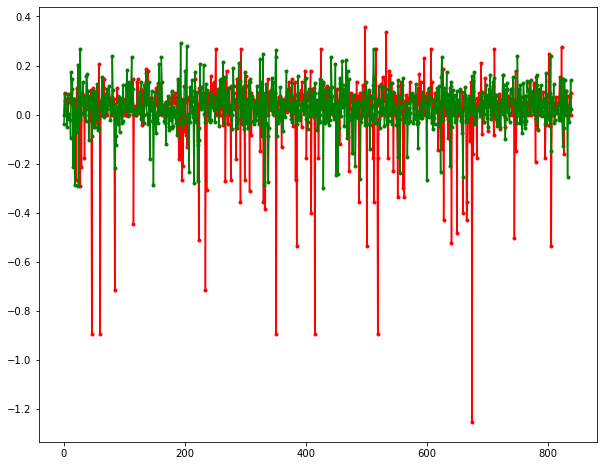

In [40]:

plt.figure(figsize=(10,8))
plt.plot(range(len(y_hat)),y_test, 'r.-')
plt.plot(range(len(y_hat)),y_hat, 'g.-')
plt.show()


<BarContainer object of 2 artists>

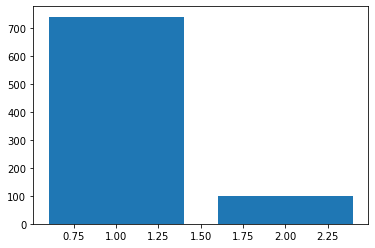

In [20]:
plt.bar([1,2],[p_dir,f_dir])

In [44]:
y_hat;

In [45]:
training = sv.fit_transform(ds.training_data)
plt.figure(figsize=(15,6))
plt.violinplot(dataset=training.to_numpy())
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [46]:
ptrain = pd.DataFrame(training,columns=ds.training_data.columns)
ds.training_data.describe()

temp  delta_t  PERF_COUNT_HW_CPU_CYCLES  \
count  2800.000000   2800.0              2.800000e+03   
mean     63.545470      1.0              1.161639e+09   
std       2.658702      0.0              1.689979e+08   
min      54.768000      1.0              3.984502e+07   
25%      62.300000      1.0              1.199886e+09   
50%      63.376000      1.0              1.199942e+09   
75%      65.528000      1.0              1.199967e+09   
max      68.218000      1.0              1.200005e+09   

       PERF_COUNT_HW_INSTRUCTIONS  PERF_COUNT_HW_CACHE_MISSES  \
count                2.800000e+03                2.800000e+03   
mean                 6.532562e+08                1.994333e+06   
std                  1.436113e+08                1.463907e+06   
min                  2.365951e+07                2.964312e+04   
25%                  5.874833e+08                1.201802e+06   
50%                  6.668326e+08                1.542860e+06   
75%                  7.338170e+08                2.035011e+06   
max                  9.712767e+08                5.846723e+06   

       PERF_COUNT_HW_BRANCH_MISSES  PERF_COUNT_HW_BRANCH_INSTRUCTIONS  \
count                 2.800000e+03                       2.800000e+03   
mean                  2.214187e+06                       7.215002e+07   
std                   6.144486e+05                       1.976835e+07   
min                   3.770767e+05                       2.983205e+06   
25%                   1.923682e+06                       6.452580e+07   
50%                   2.257762e+06                       7.567242e+07   
75%                   2.579645e+06                       8.324899e+07   
max                   8.606592e+06                       1.205947e+08   

       PERF_COUNT_HW_CACHE_LL_read_miss  PERF_COUNT_HW_CACHE_L1D_read_miss  \
count                      2.800000e+03                       2.800000e+03   
mean                       1.018098e+06                       1.994362e+06   
std                        4.527702e+05                       1.463915e+06   
min                        6.818250e+03                       2.968035e+04   
25%                        7.564116e+05                       1.201825e+06   
50%                        1.069688e+06                       1.542890e+06   
75%                        1.344597e+06                       2.035034e+06   
max                        2.123231e+06                       5.846767e+06   

            d_temp  
count  2800.000000  
mean      0.026273  
std       0.127126  
min      -1.254541  
25%       0.012858  
50%       0.046782  
75%       0.071158  
max       0.805829

In [56]:
y = ds.training_data.d_temp.to_numpy()
X = ds.training_data.drop('d_temp',axis=1)

sv = MinMaxScaler()
Xv = sv.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xv,y,test_size = .3)

Lv = linear_model.Ridge(alpha=1, fit_intercept = False)
Lv.fit(X_train, y_train)
x = zip(X.columns,Lv.coef_)
#for i in x: print(i)
param_dict = {}
for i in x: param_dict[i[0]] = i[1]
    
def v_predict(X):
    Xs = sv.transform(X)
    return Lv.predict(Xs)

pd.DataFrame({'parameter value':Lv.coef_}, index=X.columns)

parameter value
temp                                     -0.357824
delta_t                                   0.000000
PERF_COUNT_HW_CPU_CYCLES                  0.024604
PERF_COUNT_HW_INSTRUCTIONS                0.071277
PERF_COUNT_HW_CACHE_MISSES                0.006416
PERF_COUNT_HW_BRANCH_MISSES               0.073999
PERF_COUNT_HW_BRANCH_INSTRUCTIONS         0.134195
PERF_COUNT_HW_CACHE_LL_read_miss          0.196988
PERF_COUNT_HW_CACHE_L1D_read_miss         0.006483

temp: [55.844 56.92  57.458 57.996 59.61  59.072 59.61  60.148]
t0  : [55.844 56.92  57.458 57.996 59.61  59.072 59.61  60.148]
t1  : [56.92  57.458 57.996 59.61  59.072 59.61  60.148 60.148]
dt  : [ 1.076  0.538  0.538  1.614 -0.538  0.538  0.538  0.   ]


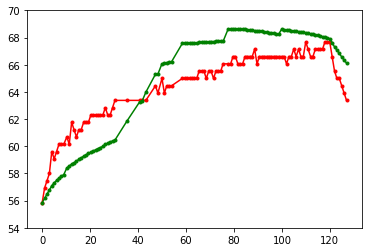

temp: [55.306 56.92  57.996 59.072 60.148 60.686 60.686 60.148]
t0  : [55.306 56.92  57.996 59.072 60.148 60.686 60.686 60.148]
t1  : [56.92  57.996 59.072 60.148 60.686 60.686 60.148 61.224]
dt  : [ 1.614  1.076  1.076  1.076  0.538  0.    -0.538  1.076]


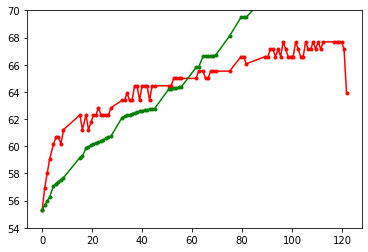

temp: [55.306 56.92  57.458 57.996 59.072 59.61  59.072 60.148]
t0  : [55.306 56.92  57.458 57.996 59.072 59.61  59.072 60.148]
t1  : [56.92  57.458 57.996 59.072 59.61  59.072 60.148 59.072]
dt  : [ 1.614  0.538  0.538  1.076  0.538 -0.538  1.076 -1.076]


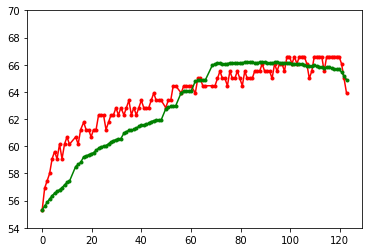

temp: [54.768 56.92  56.92  57.458 58.534 59.61  60.148 60.148]
t0  : [54.768 56.92  56.92  57.458 58.534 59.61  60.148 60.148]
t1  : [56.92  56.92  57.458 58.534 59.61  60.148 60.148 60.686]
dt  : [2.152 0.    0.538 1.076 1.076 0.538 0.    0.538]


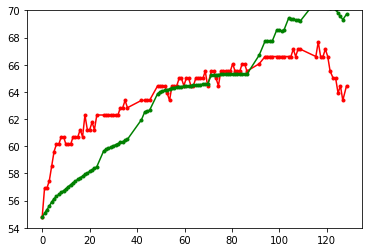

temp: [54.768 56.382 57.458 59.072 59.072 59.072 60.148 60.148]
t0  : [54.768 56.382 57.458 59.072 59.072 59.072 60.148 60.148]
t1  : [56.382 57.458 59.072 59.072 59.072 60.148 60.148 60.686]
dt  : [1.614 1.076 1.614 0.    0.    1.076 0.    0.538]


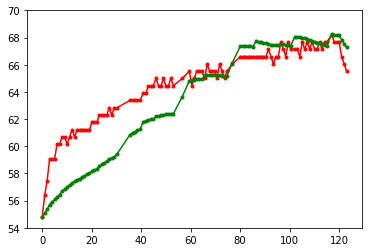

temp: [55.306 56.92  58.534 59.61  59.61  59.61  60.148 60.686]
t0  : [55.306 56.92  58.534 59.61  59.61  59.61  60.148 60.686]
t1  : [56.92  58.534 59.61  59.61  59.61  60.148 60.686 60.148]
dt  : [ 1.614  1.614  1.076  0.     0.     0.538  0.538 -0.538]


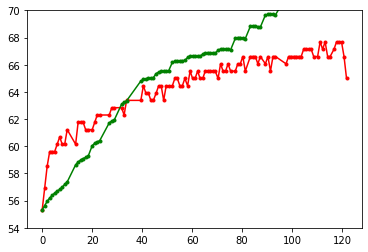

temp: [55.306 56.382 57.458 57.996 59.61  60.148 60.148 60.148]
t0  : [55.306 56.382 57.458 57.996 59.61  60.148 60.148 60.148]
t1  : [56.382 57.458 57.996 59.61  60.148 60.148 60.148 60.148]
dt  : [1.076 1.076 0.538 1.614 0.538 0.    0.    0.   ]


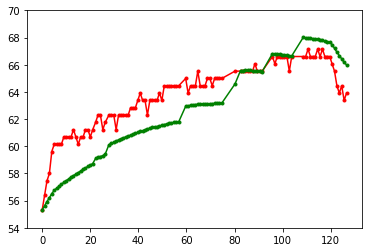

temp: [55.306 56.382 56.92  57.996 59.072 58.534 59.61  59.61 ]
t0  : [55.306 56.382 56.92  57.996 59.072 58.534 59.61  59.61 ]
t1  : [56.382 56.92  57.996 59.072 58.534 59.61  59.61  60.148]
dt  : [ 1.076  0.538  1.076  1.076 -0.538  1.076  0.     0.538]


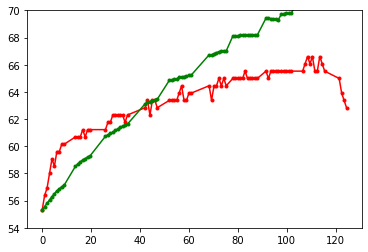

temp: [55.306 56.92  56.92  57.996 58.534 57.996 57.996 58.534]
t0  : [55.306 56.92  56.92  57.996 58.534 57.996 57.996 58.534]
t1  : [56.92  56.92  57.996 58.534 57.996 57.996 58.534 59.072]
dt  : [ 1.614  0.     1.076  0.538 -0.538  0.     0.538  0.538]


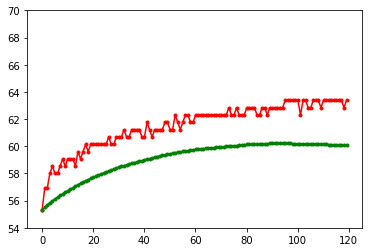

temp: [55.306 56.92  57.996 58.534 59.61  59.61  59.61  60.148]
t0  : [55.306 56.92  57.996 58.534 59.61  59.61  59.61  60.148]
t1  : [56.92  57.996 58.534 59.61  59.61  59.61  60.148 60.148]
dt  : [1.614 1.076 0.538 1.076 0.    0.    0.538 0.   ]


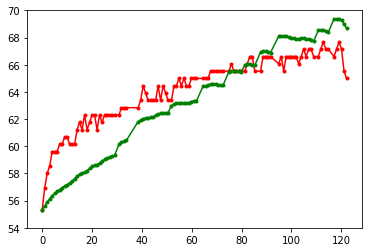

temp: [55.844 56.92  58.534 59.072 59.072 59.072 59.072 59.61 ]
t0  : [55.844 56.92  58.534 59.072 59.072 59.072 59.072 59.61 ]
t1  : [56.92  58.534 59.072 59.072 59.072 59.072 59.61  60.686]
dt  : [1.076 1.614 0.538 0.    0.    0.    0.538 1.076]


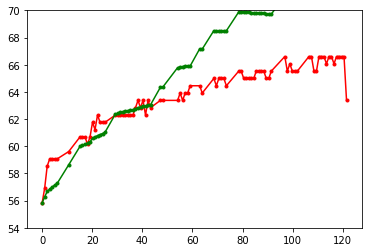

temp: [54.768 56.382 57.458 57.996 57.996 57.996 57.996 57.996]
t0  : [54.768 56.382 57.458 57.996 57.996 57.996 57.996 57.996]
t1  : [56.382 57.458 57.996 57.996 57.996 57.996 57.996 57.996]
dt  : [1.614 1.076 0.538 0.    0.    0.    0.    0.   ]


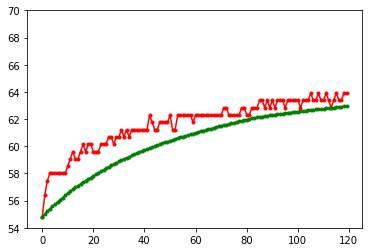

temp: [55.306 56.92  57.996 57.996 58.534 58.534 58.534 58.534]
t0  : [55.306 56.92  57.996 57.996 58.534 58.534 58.534 58.534]
t1  : [56.92  57.996 57.996 58.534 58.534 58.534 58.534 59.072]
dt  : [1.614 1.076 0.    0.538 0.    0.    0.    0.538]


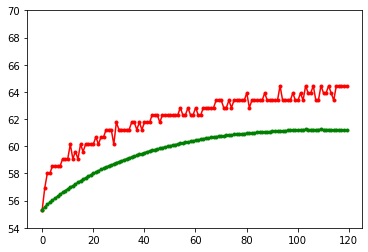

temp: [55.844 56.92  57.458 59.072 59.61  60.148 60.148 60.148]
t0  : [55.844 56.92  57.458 59.072 59.61  60.148 60.148 60.148]
t1  : [56.92  57.458 59.072 59.61  60.148 60.148 60.148 60.686]
dt  : [1.076 0.538 1.614 0.538 0.538 0.    0.    0.538]


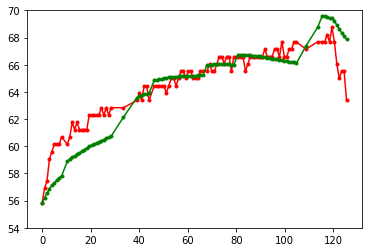

temp: [55.306 56.92  57.996 58.534 59.072 59.61  59.61  60.148]
t0  : [55.306 56.92  57.996 58.534 59.072 59.61  59.61  60.148]
t1  : [56.92  57.996 58.534 59.072 59.61  59.61  60.148 60.148]
dt  : [1.614 1.076 0.538 0.538 0.538 0.    0.538 0.   ]


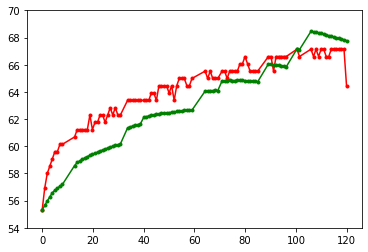

temp: [55.306 56.92  56.92  59.072 59.072 59.072 59.61  60.148]
t0  : [55.306 56.92  56.92  59.072 59.072 59.072 59.61  60.148]
t1  : [56.92  56.92  59.072 59.072 59.072 59.61  60.148 60.148]
dt  : [1.614 0.    2.152 0.    0.    0.538 0.538 0.   ]


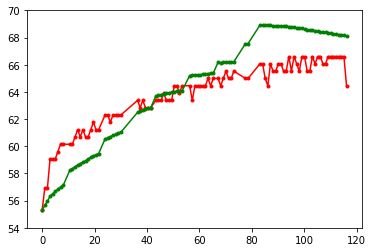

temp: [54.768 56.92  57.458 57.996 57.996 58.534 59.072 57.996]
t0  : [54.768 56.92  57.458 57.996 57.996 58.534 59.072 57.996]
t1  : [56.92  57.458 57.996 57.996 58.534 59.072 57.996 59.072]
dt  : [ 2.152  0.538  0.538  0.     0.538  0.538 -1.076  1.076]


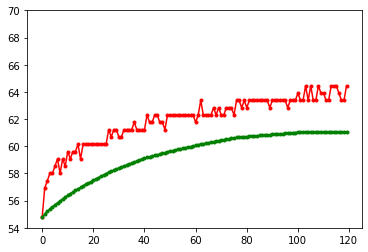

temp: [54.768 56.92  57.458 58.534 59.072 59.61  60.148 60.148]
t0  : [54.768 56.92  57.458 58.534 59.072 59.61  60.148 60.148]
t1  : [56.92  57.458 58.534 59.072 59.61  60.148 60.148 60.148]
dt  : [2.152 0.538 1.076 0.538 0.538 0.538 0.    0.   ]


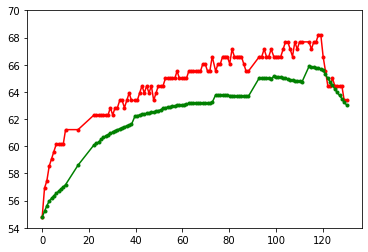

temp: [55.844 57.458 57.996 59.072 60.148 60.148 60.686 61.224]
t0  : [55.844 57.458 57.996 59.072 60.148 60.148 60.686 61.224]
t1  : [57.458 57.996 59.072 60.148 60.148 60.686 61.224 60.686]
dt  : [ 1.614  0.538  1.076  1.076  0.     0.538  0.538 -0.538]


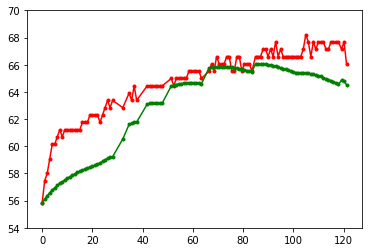

temp: [55.306 56.92  57.996 57.996 59.072 59.61  60.148 60.148]
t0  : [55.306 56.92  57.996 57.996 59.072 59.61  60.148 60.148]
t1  : [56.92  57.996 57.996 59.072 59.61  60.148 60.148 60.686]
dt  : [1.614 1.076 0.    1.076 0.538 0.538 0.    0.538]


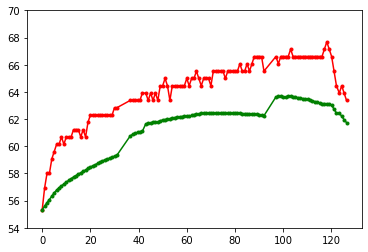

temp: [55.306 56.92  57.458 60.148 60.148 60.148 60.148 60.148]
t0  : [55.306 56.92  57.458 60.148 60.148 60.148 60.148 60.148]
t1  : [56.92  57.458 60.148 60.148 60.148 60.148 60.148 60.686]
dt  : [1.614 0.538 2.69  0.    0.    0.    0.    0.538]


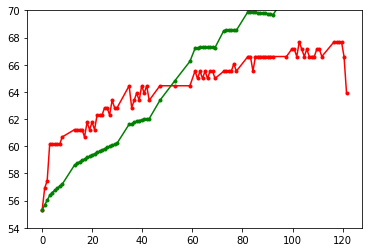

temp: [55.844 56.92  57.458 57.996 57.996 59.072 58.534 59.072]
t0  : [55.844 56.92  57.458 57.996 57.996 59.072 58.534 59.072]
t1  : [56.92  57.458 57.996 57.996 59.072 58.534 59.072 59.072]
dt  : [ 1.076  0.538  0.538  0.     1.076 -0.538  0.538  0.   ]


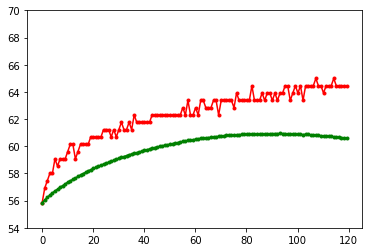

temp: [54.768 56.92  56.92  59.072 59.072 59.61  59.072 59.072]
t0  : [54.768 56.92  56.92  59.072 59.072 59.61  59.072 59.072]
t1  : [56.92  56.92  59.072 59.072 59.61  59.072 59.072 59.072]
dt  : [ 2.152  0.     2.152  0.     0.538 -0.538  0.     0.   ]


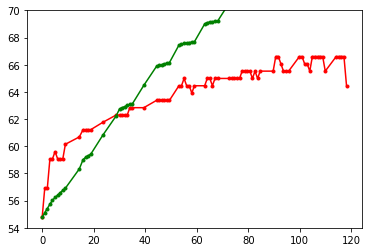

temp: [55.844 56.92  57.996 57.996 57.996 59.072 59.072 59.072]
t0  : [55.844 56.92  57.996 57.996 57.996 59.072 59.072 59.072]
t1  : [56.92  57.996 57.996 57.996 59.072 59.072 59.072 59.072]
dt  : [1.076 1.076 0.    0.    1.076 0.    0.    0.   ]


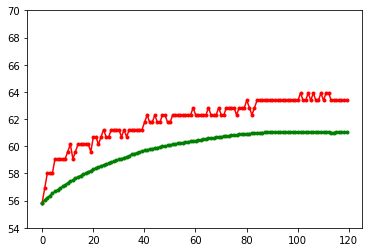

temp: [55.844 56.92  57.996 59.072 60.148 60.148 59.61  60.148]
t0  : [55.844 56.92  57.996 59.072 60.148 60.148 59.61  60.148]
t1  : [56.92  57.996 59.072 60.148 60.148 59.61  60.148 60.148]
dt  : [ 1.076  1.076  1.076  1.076  0.    -0.538  0.538  0.   ]


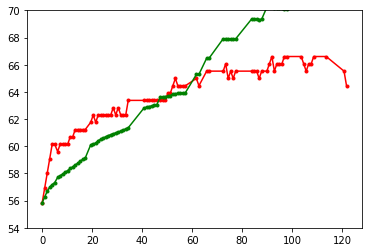

temp: [55.306 57.458 57.458 58.534 59.072 60.148 60.686 60.686]
t0  : [55.306 57.458 57.458 58.534 59.072 60.148 60.686 60.686]
t1  : [57.458 57.458 58.534 59.072 60.148 60.686 60.686 60.148]
dt  : [ 2.152  0.     1.076  0.538  1.076  0.538  0.    -0.538]


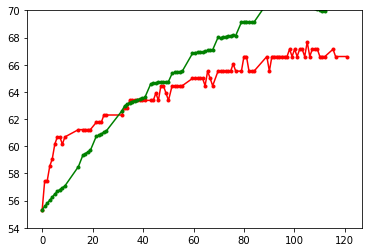

temp: [54.768 56.382 57.458 57.458 59.072 59.61  59.61  60.148]
t0  : [54.768 56.382 57.458 57.458 59.072 59.61  59.61  60.148]
t1  : [56.382 57.458 57.458 59.072 59.61  59.61  60.148 60.148]
dt  : [1.614 1.076 0.    1.614 0.538 0.    0.538 0.   ]


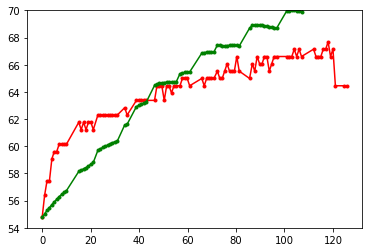

temp: [54.768 56.92  56.92  59.072 59.61  59.072 60.148 60.148]
t0  : [54.768 56.92  56.92  59.072 59.61  59.072 60.148 60.148]
t1  : [56.92  56.92  59.072 59.61  59.072 60.148 60.148 60.686]
dt  : [ 2.152  0.     2.152  0.538 -0.538  1.076  0.     0.538]


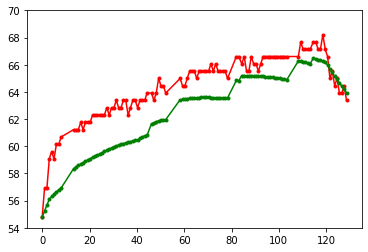

IndexError: list index out of range

In [60]:
for idx in range(30):
    fname = ds.train_files[idx]
    td = dataset._delta_temp_column(fname)
    td = dataset.load_dataframe(fname)
    truth, pred, time = ds.trace_manual(td, v_predict)
    plt.figure(figsize=(6,4))
    plt.ylim((54,70))
    plt.plot(time,truth,'r.-')
    plt.plot(time,pred[:-1],'g.-')
    plt.show()

temp: [55.844 56.92  57.458 57.996 59.61  59.072 59.61  60.148]
t0  : [55.844 56.92  57.458 57.996 59.61  59.072 59.61  60.148]
t1  : [56.92  57.458 57.996 59.61  59.072 59.61  60.148 60.148]
dt  : [ 1.076  0.538  0.538  1.614 -0.538  0.538  0.538  0.   ]


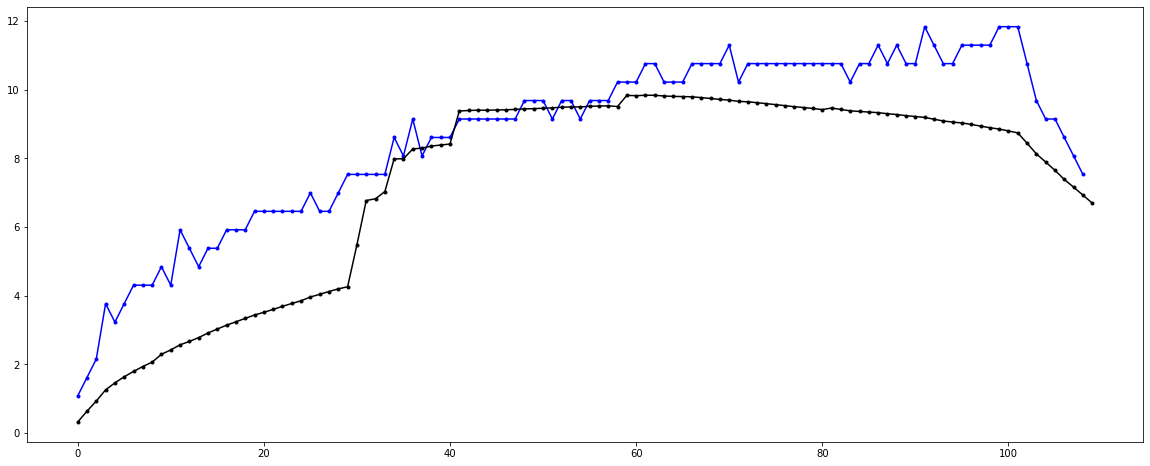

temp: [55.306 56.92  57.996 59.072 60.148 60.686 60.686 60.148]
t0  : [55.306 56.92  57.996 59.072 60.148 60.686 60.686 60.148]
t1  : [56.92  57.996 59.072 60.148 60.686 60.686 60.148 61.224]
dt  : [ 1.614  1.076  1.076  1.076  0.538  0.    -0.538  1.076]


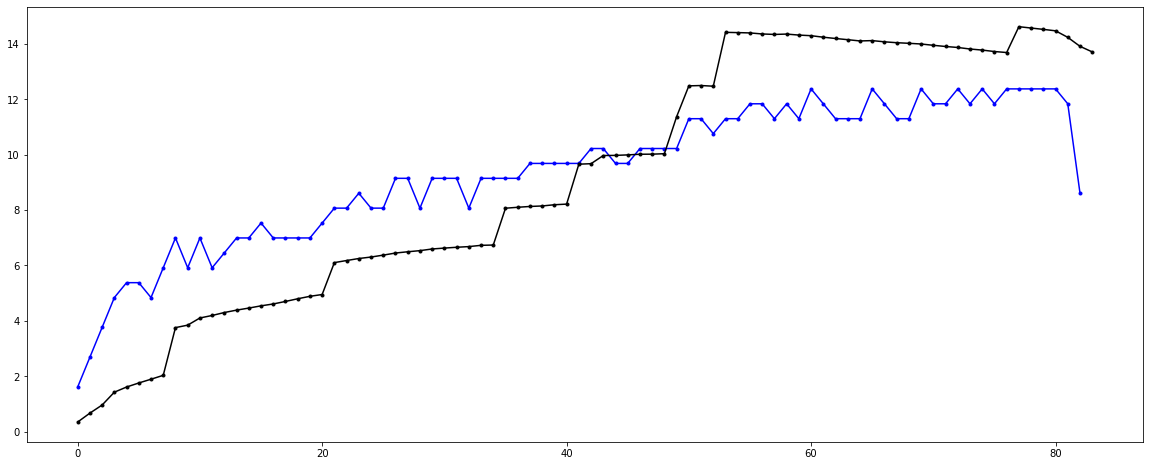

temp: [55.306 56.92  57.458 57.996 59.072 59.61  59.072 60.148]
t0  : [55.306 56.92  57.458 57.996 59.072 59.61  59.072 60.148]
t1  : [56.92  57.458 57.996 59.072 59.61  59.072 60.148 59.072]
dt  : [ 1.614  0.538  0.538  1.076  0.538 -0.538  1.076 -1.076]


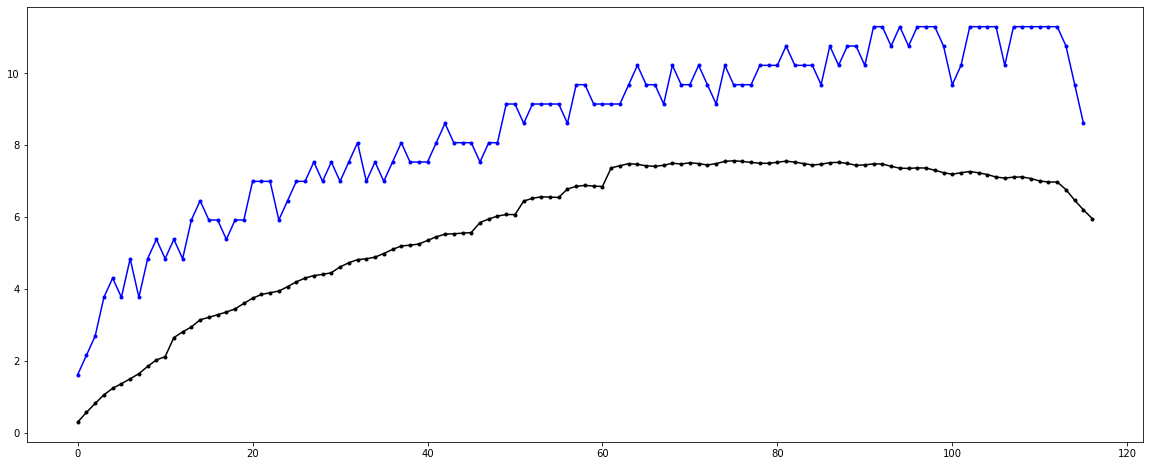

temp: [54.768 56.92  56.92  57.458 58.534 59.61  60.148 60.148]
t0  : [54.768 56.92  56.92  57.458 58.534 59.61  60.148 60.148]
t1  : [56.92  56.92  57.458 58.534 59.61  60.148 60.148 60.686]
dt  : [2.152 0.    0.538 1.076 1.076 0.538 0.    0.538]


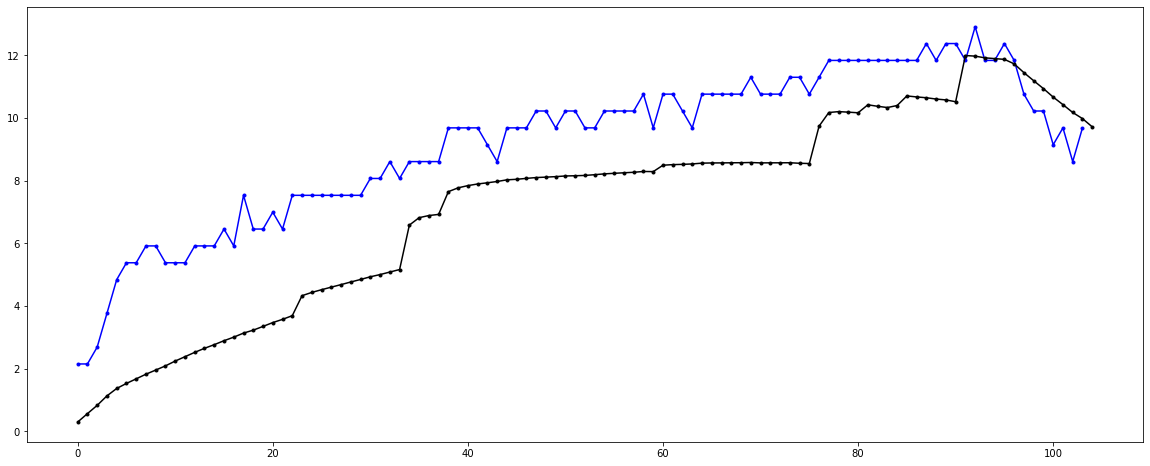

temp: [54.768 56.382 57.458 59.072 59.072 59.072 60.148 60.148]
t0  : [54.768 56.382 57.458 59.072 59.072 59.072 60.148 60.148]
t1  : [56.382 57.458 59.072 59.072 59.072 60.148 60.148 60.686]
dt  : [1.614 1.076 1.614 0.    0.    1.076 0.    0.538]


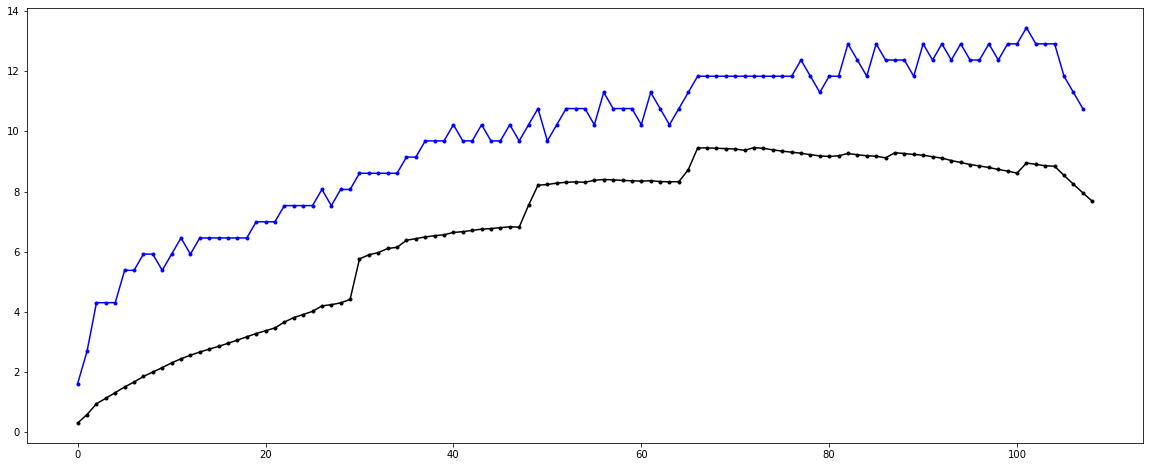

temp: [55.306 56.92  58.534 59.61  59.61  59.61  60.148 60.686]
t0  : [55.306 56.92  58.534 59.61  59.61  59.61  60.148 60.686]
t1  : [56.92  58.534 59.61  59.61  59.61  60.148 60.686 60.148]
dt  : [ 1.614  1.614  1.076  0.     0.     0.538  0.538 -0.538]


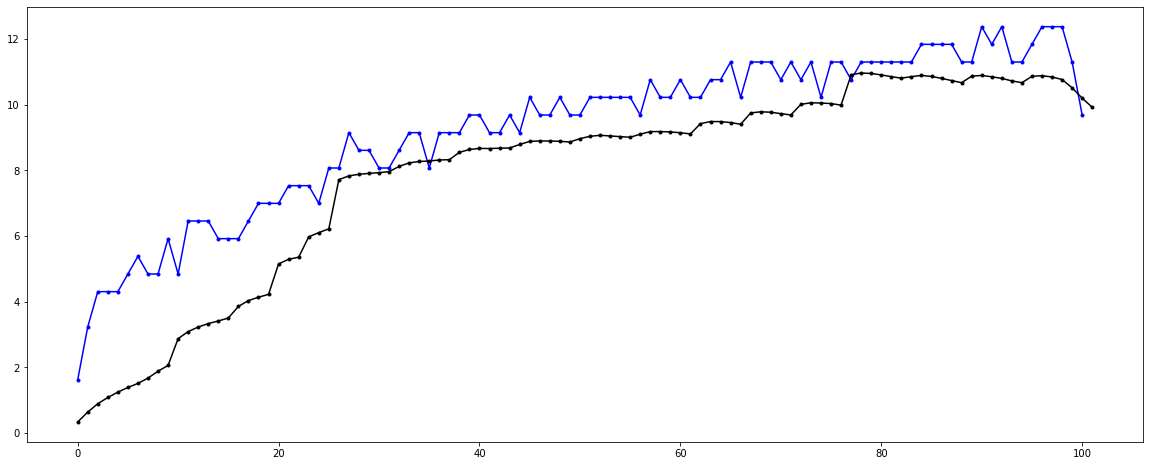

temp: [55.306 56.382 57.458 57.996 59.61  60.148 60.148 60.148]
t0  : [55.306 56.382 57.458 57.996 59.61  60.148 60.148 60.148]
t1  : [56.382 57.458 57.996 59.61  60.148 60.148 60.148 60.148]
dt  : [1.076 1.076 0.538 1.614 0.538 0.    0.    0.   ]


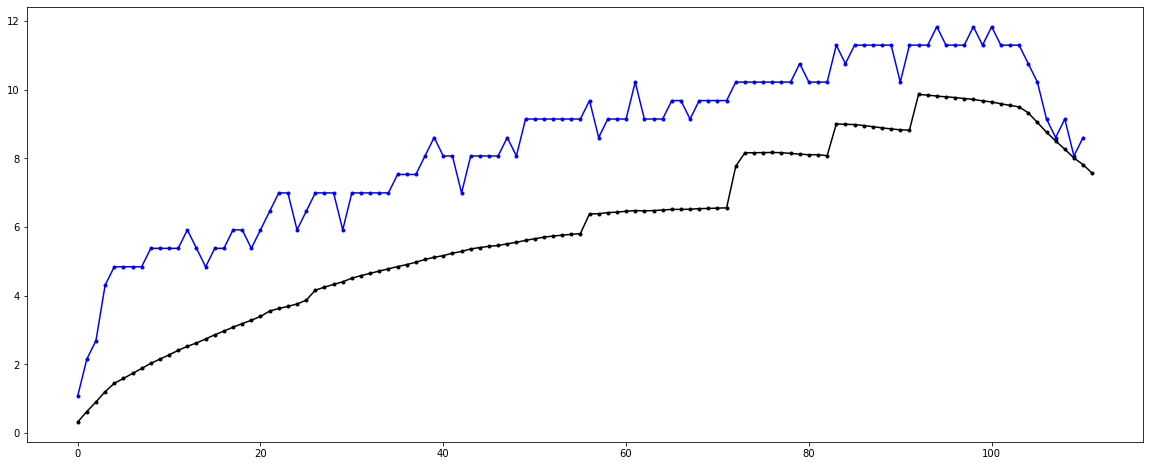

temp: [55.306 56.382 56.92  57.996 59.072 58.534 59.61  59.61 ]
t0  : [55.306 56.382 56.92  57.996 59.072 58.534 59.61  59.61 ]
t1  : [56.382 56.92  57.996 59.072 58.534 59.61  59.61  60.148]
dt  : [ 1.076  0.538  1.076  1.076 -0.538  1.076  0.     0.538]


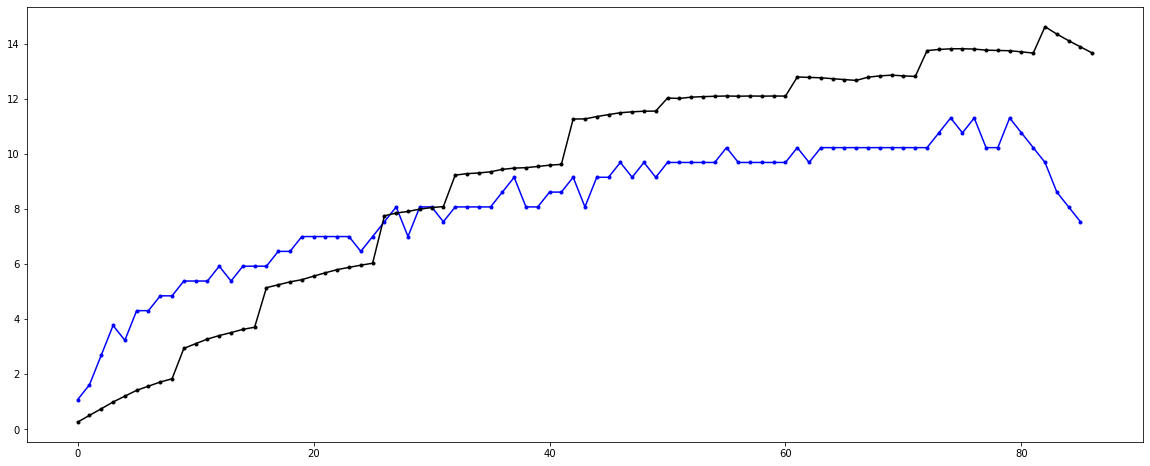

temp: [55.306 56.92  56.92  57.996 58.534 57.996 57.996 58.534]
t0  : [55.306 56.92  56.92  57.996 58.534 57.996 57.996 58.534]
t1  : [56.92  56.92  57.996 58.534 57.996 57.996 58.534 59.072]
dt  : [ 1.614  0.     1.076  0.538 -0.538  0.     0.538  0.538]


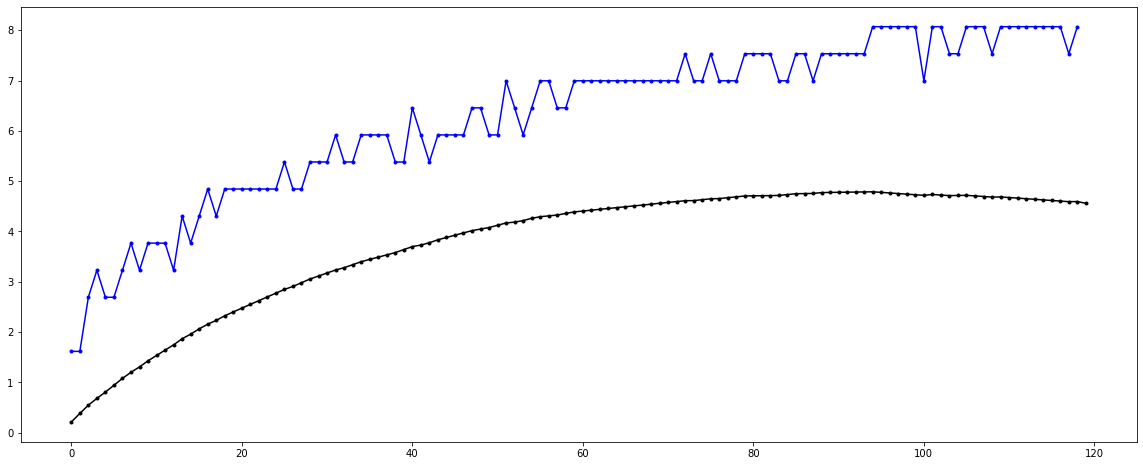

temp: [55.306 56.92  57.996 58.534 59.61  59.61  59.61  60.148]
t0  : [55.306 56.92  57.996 58.534 59.61  59.61  59.61  60.148]
t1  : [56.92  57.996 58.534 59.61  59.61  59.61  60.148 60.148]
dt  : [1.614 1.076 0.538 1.076 0.    0.    0.538 0.   ]


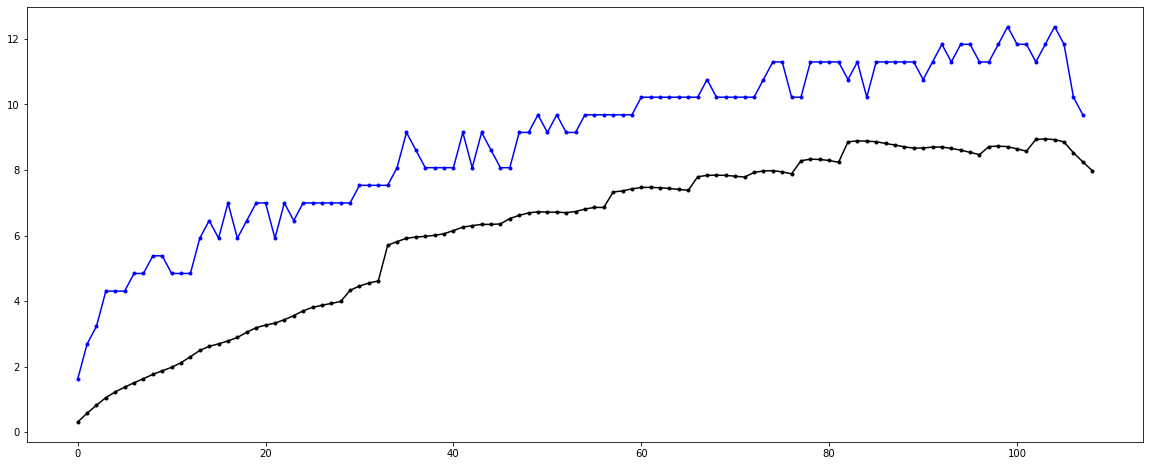

temp: [55.844 56.92  58.534 59.072 59.072 59.072 59.072 59.61 ]
t0  : [55.844 56.92  58.534 59.072 59.072 59.072 59.072 59.61 ]
t1  : [56.92  58.534 59.072 59.072 59.072 59.072 59.61  60.686]
dt  : [1.076 1.614 0.538 0.    0.    0.    0.538 1.076]


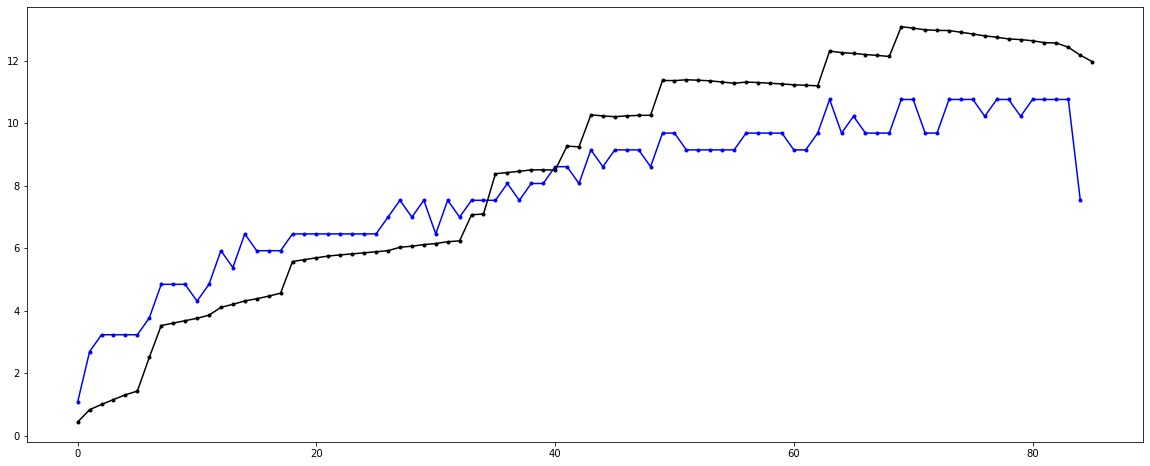

temp: [54.768 56.382 57.458 57.996 57.996 57.996 57.996 57.996]
t0  : [54.768 56.382 57.458 57.996 57.996 57.996 57.996 57.996]
t1  : [56.382 57.458 57.996 57.996 57.996 57.996 57.996 57.996]
dt  : [1.614 1.076 0.538 0.    0.    0.    0.    0.   ]


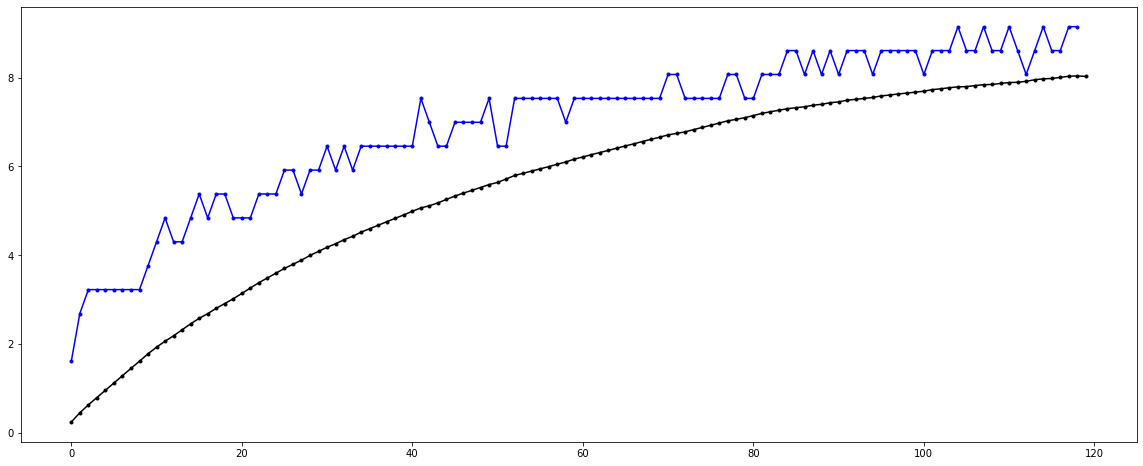

temp: [55.306 56.92  57.996 57.996 58.534 58.534 58.534 58.534]
t0  : [55.306 56.92  57.996 57.996 58.534 58.534 58.534 58.534]
t1  : [56.92  57.996 57.996 58.534 58.534 58.534 58.534 59.072]
dt  : [1.614 1.076 0.    0.538 0.    0.    0.    0.538]


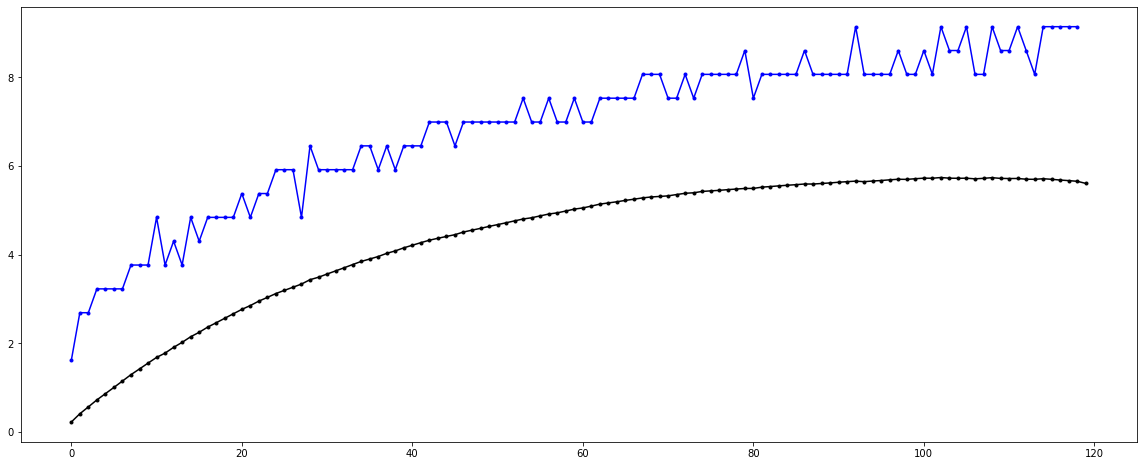

temp: [55.844 56.92  57.458 59.072 59.61  60.148 60.148 60.148]
t0  : [55.844 56.92  57.458 59.072 59.61  60.148 60.148 60.148]
t1  : [56.92  57.458 59.072 59.61  60.148 60.148 60.148 60.686]
dt  : [1.076 0.538 1.614 0.538 0.538 0.    0.    0.538]


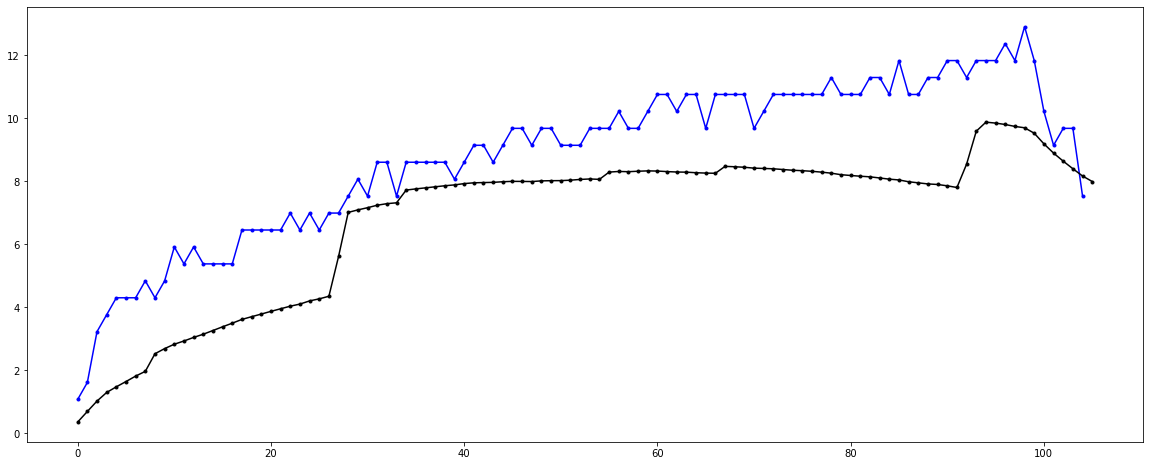

temp: [55.306 56.92  57.996 58.534 59.072 59.61  59.61  60.148]
t0  : [55.306 56.92  57.996 58.534 59.072 59.61  59.61  60.148]
t1  : [56.92  57.996 58.534 59.072 59.61  59.61  60.148 60.148]
dt  : [1.614 1.076 0.538 0.538 0.538 0.    0.538 0.   ]


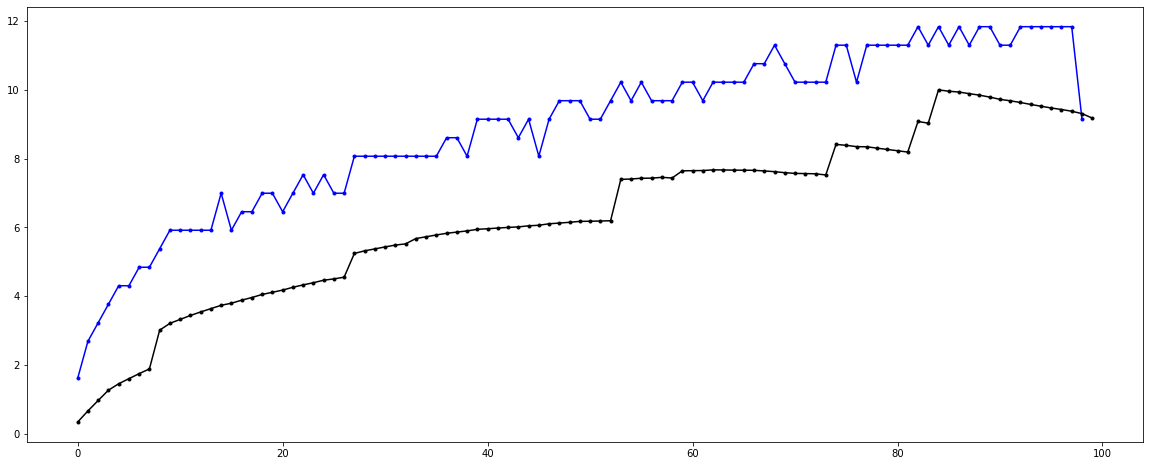

temp: [55.306 56.92  56.92  59.072 59.072 59.072 59.61  60.148]
t0  : [55.306 56.92  56.92  59.072 59.072 59.072 59.61  60.148]
t1  : [56.92  56.92  59.072 59.072 59.072 59.61  60.148 60.148]
dt  : [1.614 0.    2.152 0.    0.    0.538 0.538 0.   ]


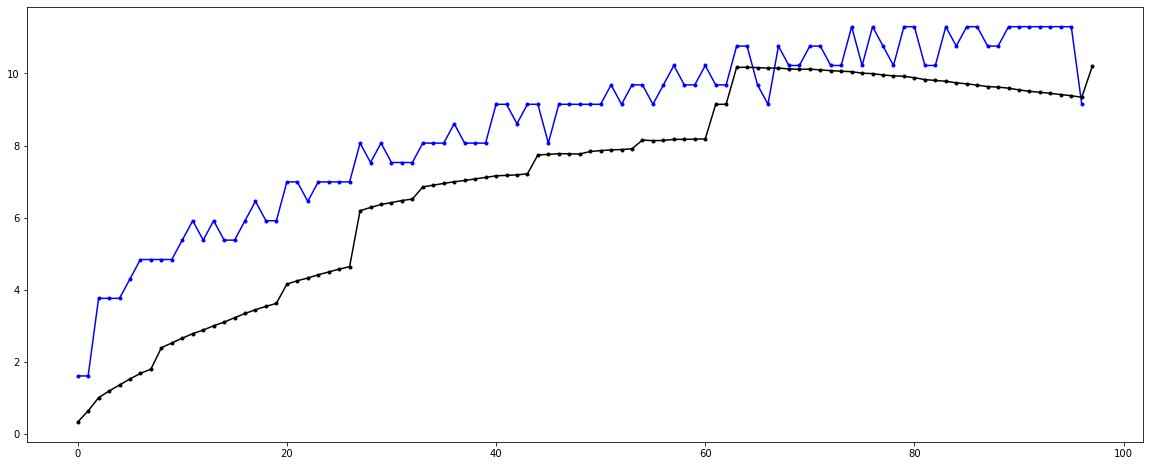

temp: [54.768 56.92  57.458 57.996 57.996 58.534 59.072 57.996]
t0  : [54.768 56.92  57.458 57.996 57.996 58.534 59.072 57.996]
t1  : [56.92  57.458 57.996 57.996 58.534 59.072 57.996 59.072]
dt  : [ 2.152  0.538  0.538  0.     0.538  0.538 -1.076  1.076]


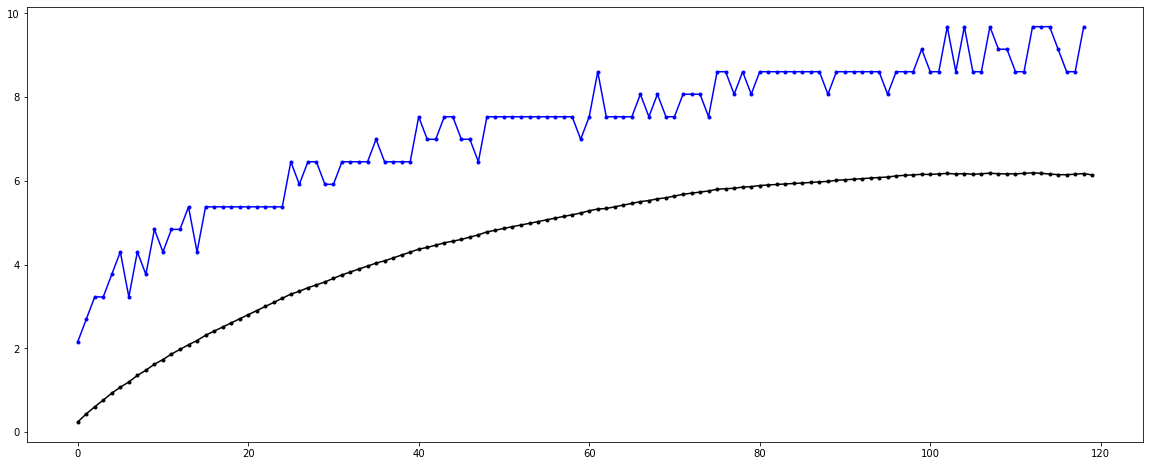

temp: [54.768 56.92  57.458 58.534 59.072 59.61  60.148 60.148]
t0  : [54.768 56.92  57.458 58.534 59.072 59.61  60.148 60.148]
t1  : [56.92  57.458 58.534 59.072 59.61  60.148 60.148 60.148]
dt  : [2.152 0.538 1.076 0.538 0.538 0.538 0.    0.   ]


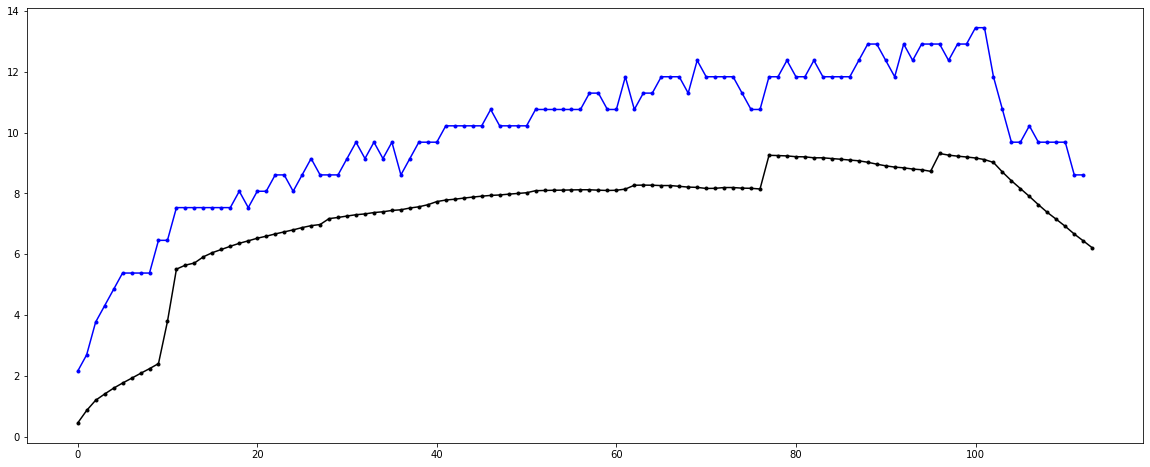

temp: [55.844 57.458 57.996 59.072 60.148 60.148 60.686 61.224]
t0  : [55.844 57.458 57.996 59.072 60.148 60.148 60.686 61.224]
t1  : [57.458 57.996 59.072 60.148 60.148 60.686 61.224 60.686]
dt  : [ 1.614  0.538  1.076  1.076  0.     0.538  0.538 -0.538]


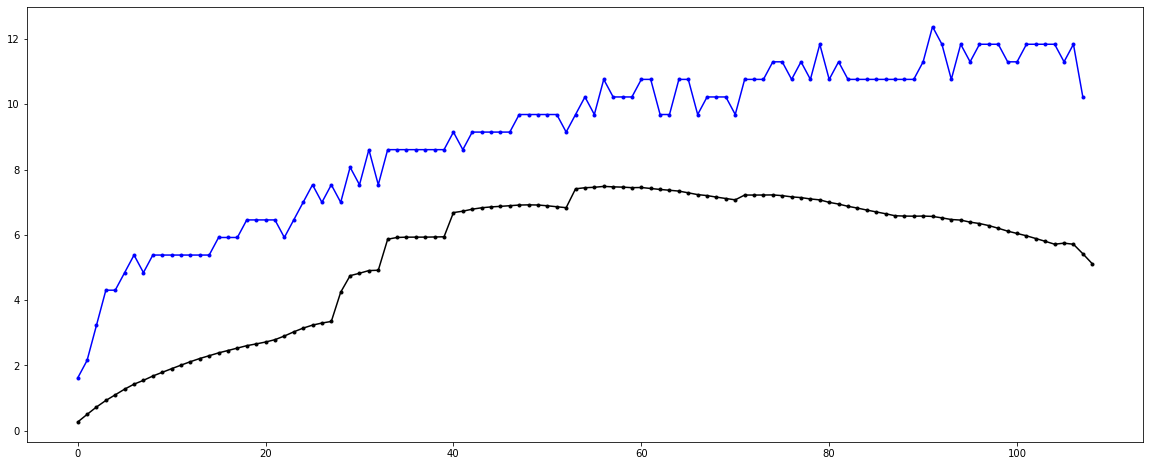

temp: [55.306 56.92  57.996 57.996 59.072 59.61  60.148 60.148]
t0  : [55.306 56.92  57.996 57.996 59.072 59.61  60.148 60.148]
t1  : [56.92  57.996 57.996 59.072 59.61  60.148 60.148 60.686]
dt  : [1.614 1.076 0.    1.076 0.538 0.538 0.    0.538]


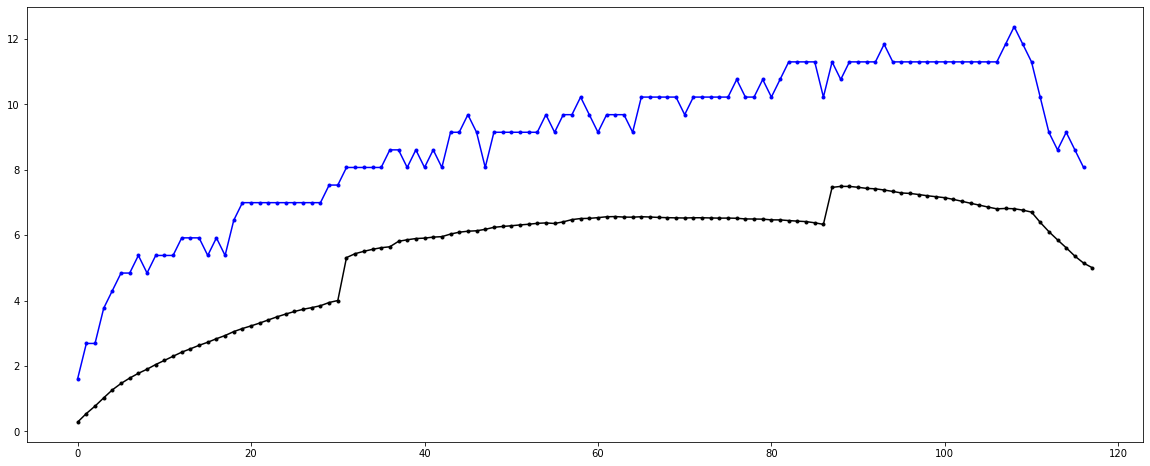

temp: [55.306 56.92  57.458 60.148 60.148 60.148 60.148 60.148]
t0  : [55.306 56.92  57.458 60.148 60.148 60.148 60.148 60.148]
t1  : [56.92  57.458 60.148 60.148 60.148 60.148 60.148 60.686]
dt  : [1.614 0.538 2.69  0.    0.    0.    0.    0.538]


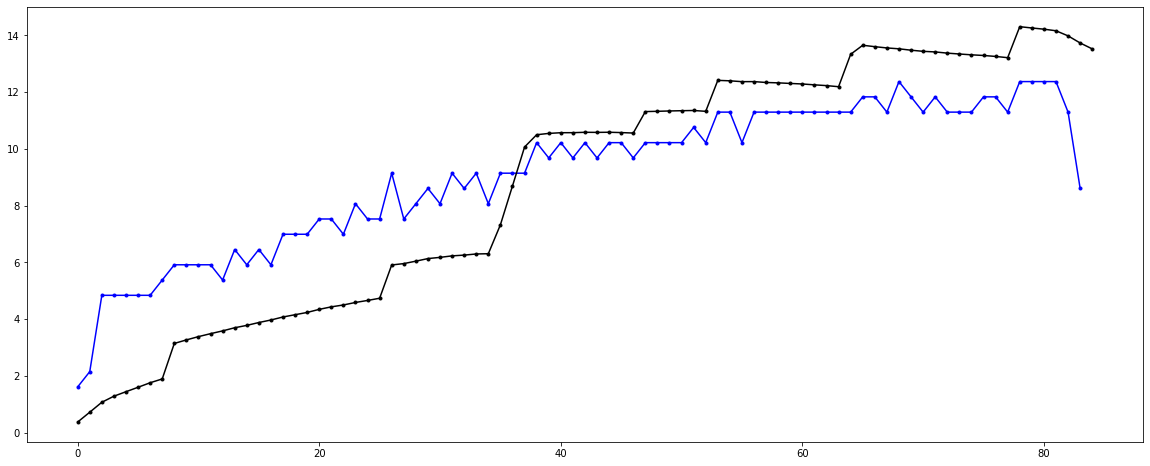

temp: [55.844 56.92  57.458 57.996 57.996 59.072 58.534 59.072]
t0  : [55.844 56.92  57.458 57.996 57.996 59.072 58.534 59.072]
t1  : [56.92  57.458 57.996 57.996 59.072 58.534 59.072 59.072]
dt  : [ 1.076  0.538  0.538  0.     1.076 -0.538  0.538  0.   ]


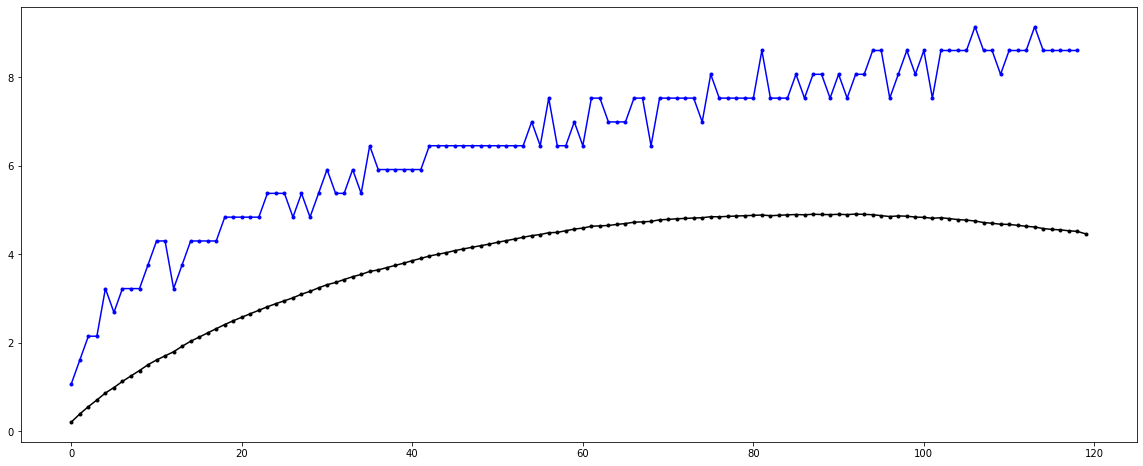

temp: [54.768 56.92  56.92  59.072 59.072 59.61  59.072 59.072]
t0  : [54.768 56.92  56.92  59.072 59.072 59.61  59.072 59.072]
t1  : [56.92  56.92  59.072 59.072 59.61  59.072 59.072 59.072]
dt  : [ 2.152  0.     2.152  0.     0.538 -0.538  0.     0.   ]


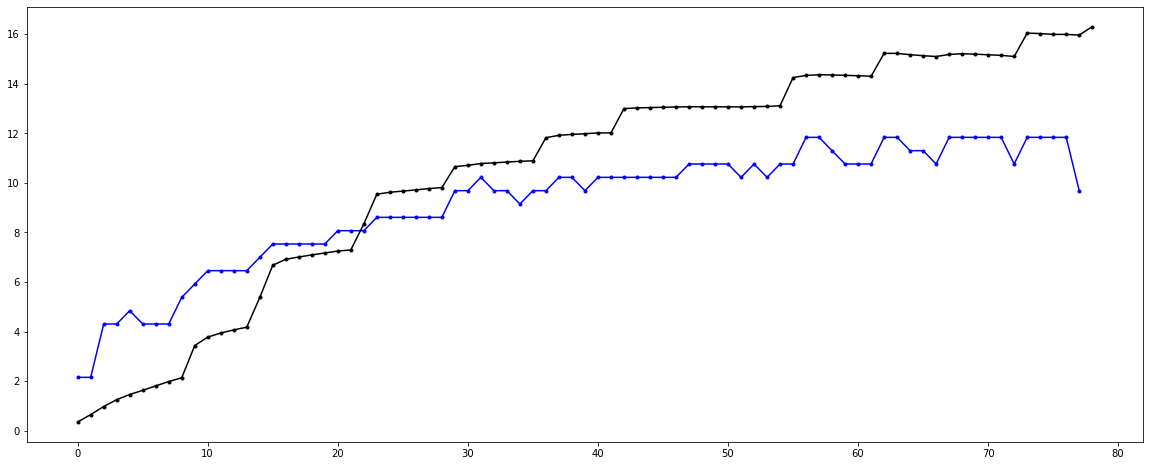

temp: [55.844 56.92  57.996 57.996 57.996 59.072 59.072 59.072]
t0  : [55.844 56.92  57.996 57.996 57.996 59.072 59.072 59.072]
t1  : [56.92  57.996 57.996 57.996 59.072 59.072 59.072 59.072]
dt  : [1.076 1.076 0.    0.    1.076 0.    0.    0.   ]


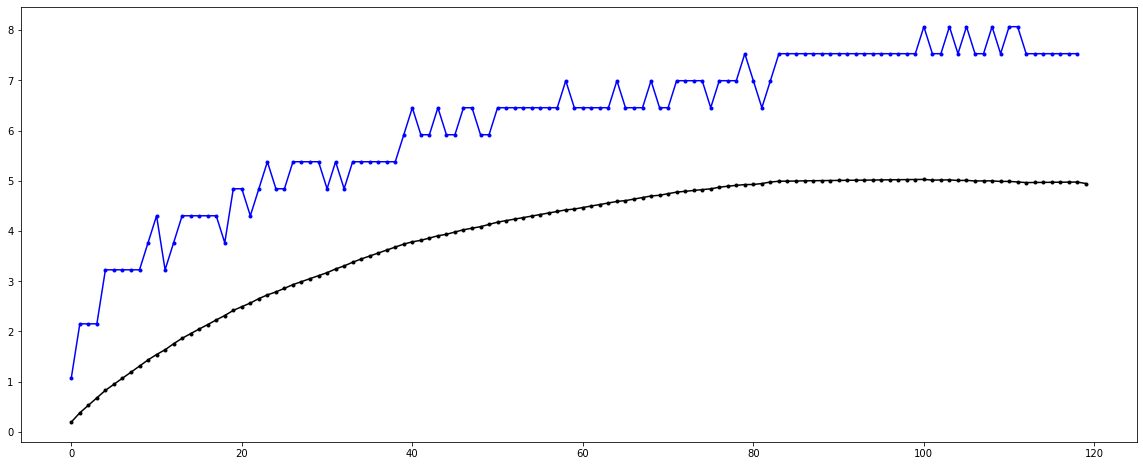

temp: [55.844 56.92  57.996 59.072 60.148 60.148 59.61  60.148]
t0  : [55.844 56.92  57.996 59.072 60.148 60.148 59.61  60.148]
t1  : [56.92  57.996 59.072 60.148 60.148 59.61  60.148 60.148]
dt  : [ 1.076  1.076  1.076  1.076  0.    -0.538  0.538  0.   ]


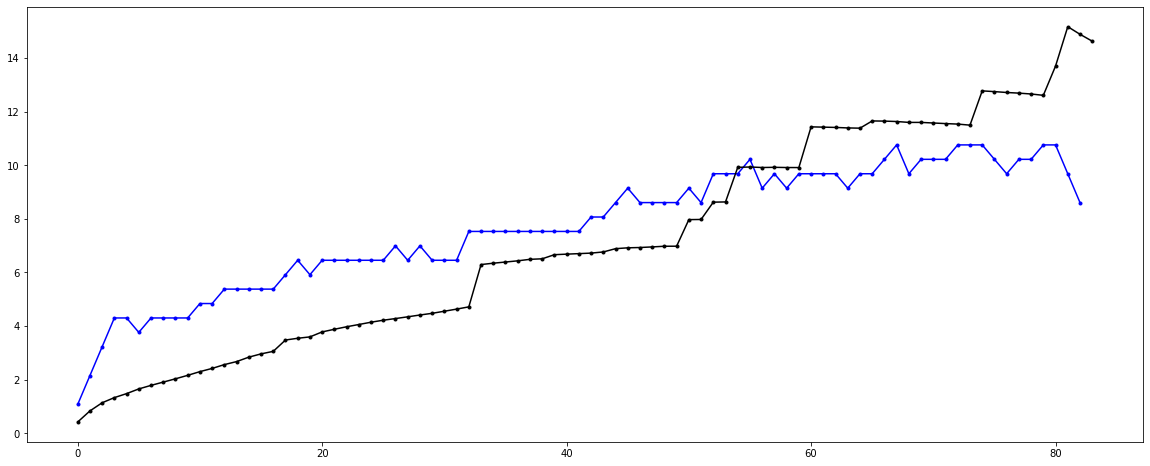

temp: [55.306 57.458 57.458 58.534 59.072 60.148 60.686 60.686]
t0  : [55.306 57.458 57.458 58.534 59.072 60.148 60.686 60.686]
t1  : [57.458 57.458 58.534 59.072 60.148 60.686 60.686 60.148]
dt  : [ 2.152  0.     1.076  0.538  1.076  0.538  0.    -0.538]


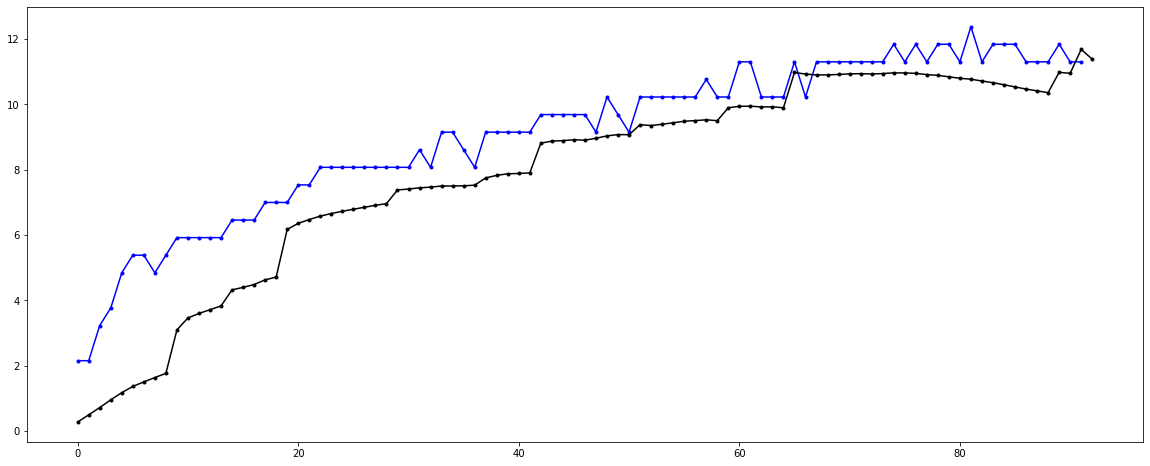

temp: [54.768 56.382 57.458 57.458 59.072 59.61  59.61  60.148]
t0  : [54.768 56.382 57.458 57.458 59.072 59.61  59.61  60.148]
t1  : [56.382 57.458 57.458 59.072 59.61  59.61  60.148 60.148]
dt  : [1.614 1.076 0.    1.614 0.538 0.    0.538 0.   ]


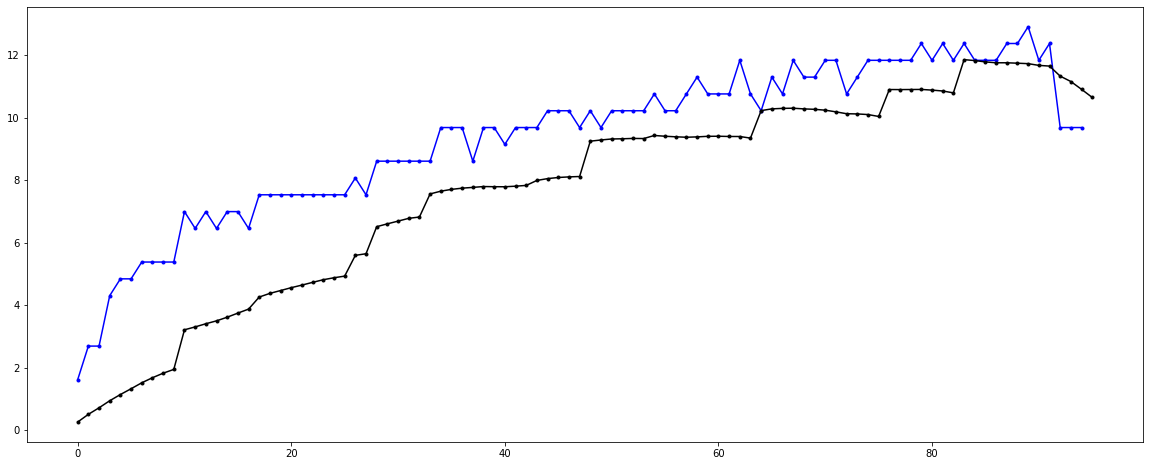

temp: [54.768 56.92  56.92  59.072 59.61  59.072 60.148 60.148]
t0  : [54.768 56.92  56.92  59.072 59.61  59.072 60.148 60.148]
t1  : [56.92  56.92  59.072 59.61  59.072 60.148 60.148 60.686]
dt  : [ 2.152  0.     2.152  0.538 -0.538  1.076  0.     0.538]


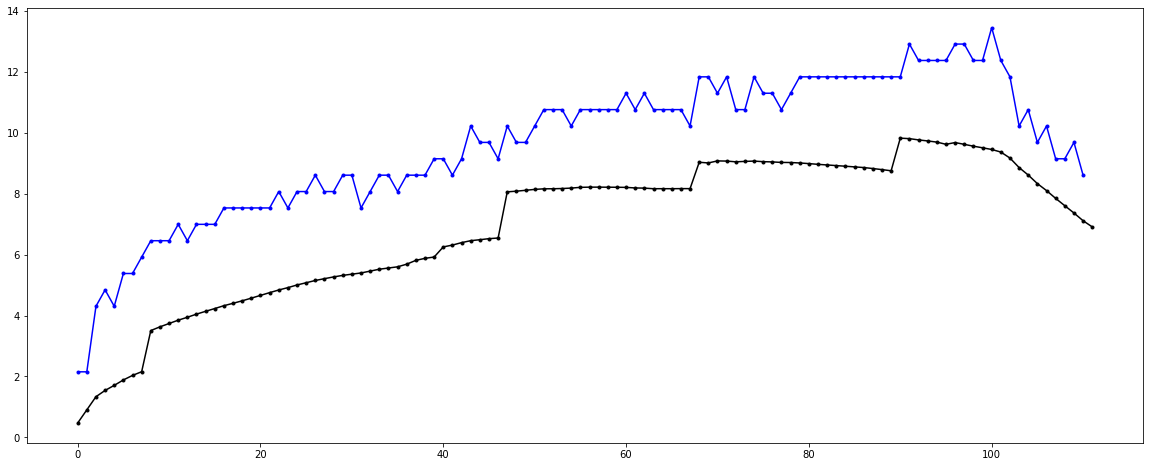

IndexError: list index out of range

In [61]:
for idx in range(30):
    fname = ds.train_files[idx]
    td = dataset.load_dataframe(fname)
    pred = Lv.predict(sv.transform(td))
    td = dataset._delta_temp_column(fname)
    truth = td.d_temp.to_numpy()
    plt.figure(figsize=(20,8))
    plt.plot(range(len(truth)), np.cumsum(truth), 'b.-')
    plt.plot(range(len(pred)), np.cumsum(pred), 'k.-')
    plt.show()
